In [1]:
from torchvision.io import read_image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import support_victor_machine as support

In [2]:
transactions = pd.read_csv('../data/transactions_train.csv')

In [3]:
transactions.shape

(31788324, 5)

In [4]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [41]:
article_counts = transactions.value_counts(subset='article_id')

In [44]:
article_counts.describe()

count    104547.000000
mean        304.057735
std         791.266060
min           1.000000
25%          14.000000
50%          65.000000
75%         286.000000
max       50287.000000
dtype: float64

In [21]:
top10 = transactions.value_counts(subset='article_id')[0:20]

top10

article_id
706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
464297007    25025
372860002    24458
610776001    22451
399223001    22236
706016003    21241
720125001    21063
156231001    21013
562245046    20719
562245001    20464
351484002    20415
399256001    20242
673396002    19834
568601006    19379
448509014    19216
673677002    19143
dtype: int64

item 4 not found (i.d. 0610776002 ).
item 8 not found (i.d. 0610776001 ).


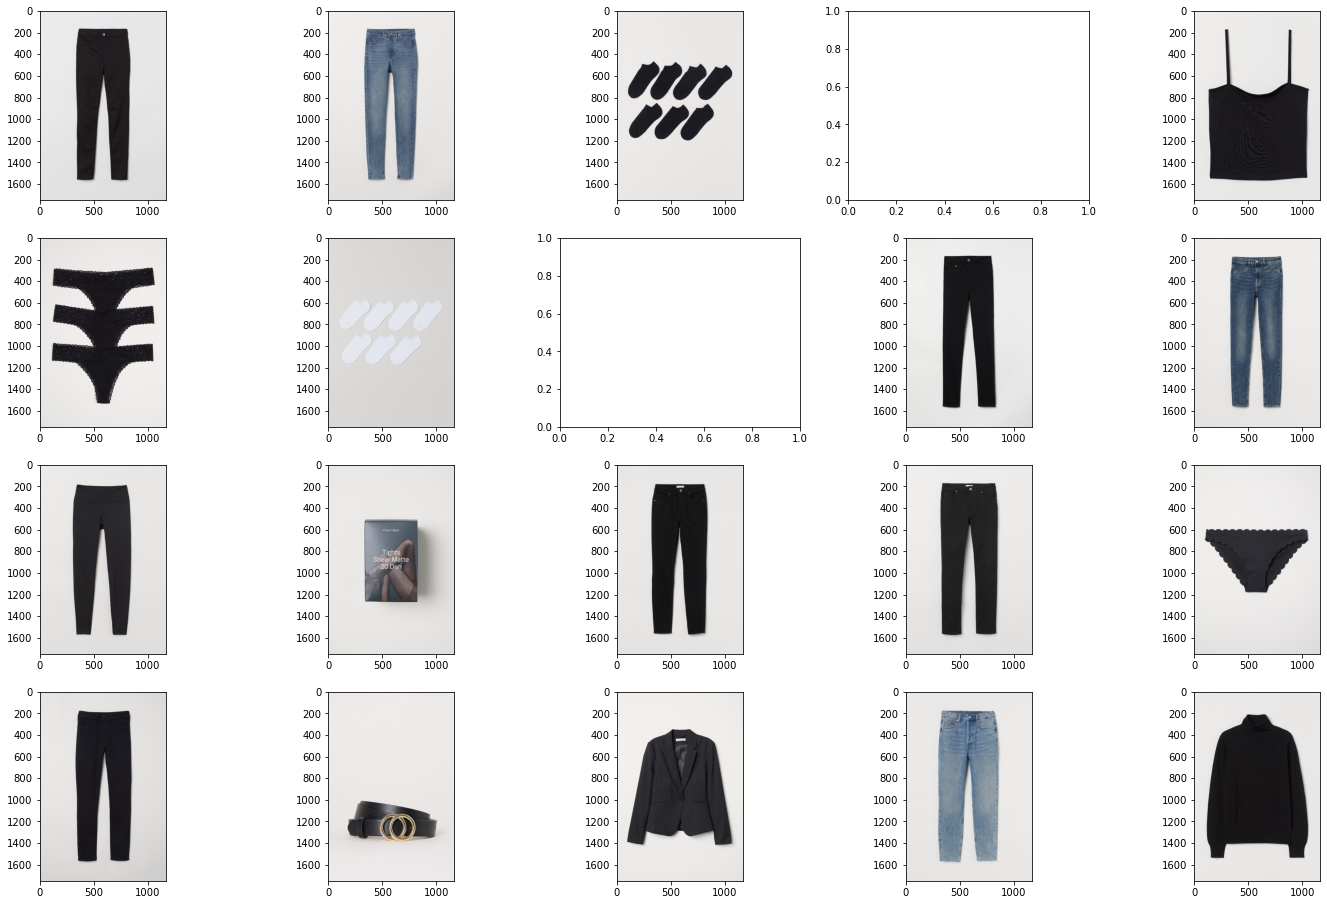

In [22]:
fig = plt.figure(figsize=(25, 16))

rows=4
columns=5

for i in range(20):
    fig.add_subplot(rows, columns, i+1)
    try:
        img = support.get_image(top10.index[i])
        imgplot = plt.imshow(img.permute(1,2,0))
    except:
        print("item "+str(i+1)+ " not found (i.d. "+"0"+str(top10.index[i])+" ).")


In [23]:
transactions.tail(5)

,t_dat,customer_id,article_id,price,sales_channel_id
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1
31788323,2020-09-22,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,898573003,0.033881,2


In [26]:
cust_counts = transactions.groupby('customer_id')['t_dat'].count()

In [29]:
cust_counts.sort_values(ascending=False)[0:20]

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1157
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1143
e34f8aa5e7c8c258523ea3e5f5f13168b6c21a9e8bffccd515dd5cef56126efb    1117
3493c55a7fe252c84a9a03db338f5be7afbce1edbca12f3a908fac9b983692f2    1115
0bf4c6fd4e9d33f9bfb807bb78348cbf5c565846ff4006acf5c1b9aea77b0e54    1099
e6498c7514c61d3c24669f49753dc83fdff3ec1

In [30]:
1895/(2*365)

2.595890410958904

In [31]:
top_customer = transactions[ transactions['customer_id'] == 'be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b' ]

In [37]:
top_customer.value_counts('article_id')[0:20]

article_id
253448001    8
668956001    7
826500008    7
704126005    6
827411001    6
777099001    6
828934001    6
706016029    6
787696001    5
863665002    4
827698001    4
568751005    4
733099001    4
811907003    4
829052001    4
806807001    4
823317003    4
684209004    4
889379003    4
821674001    4
dtype: int64

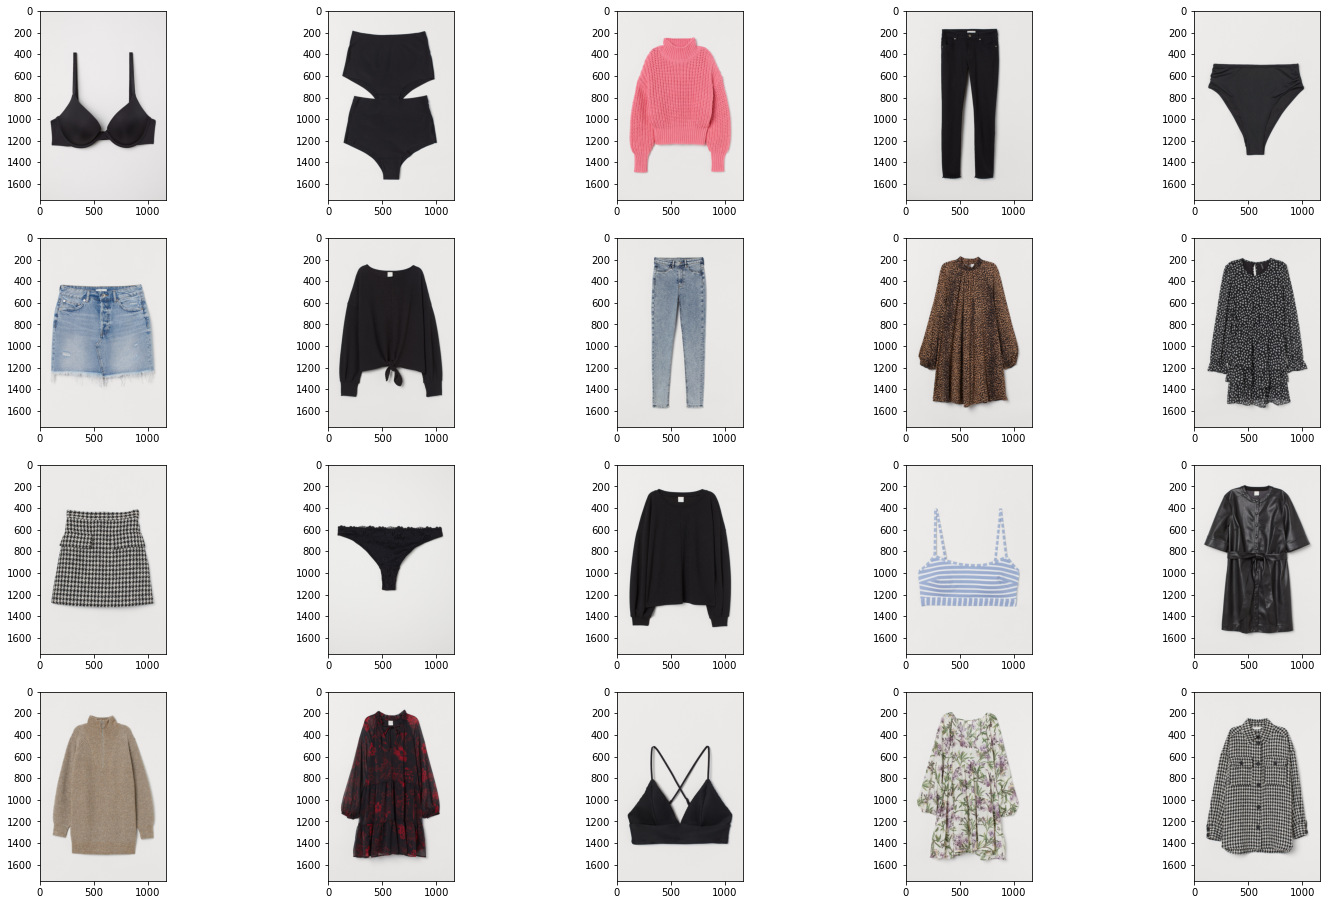

In [36]:
fig = plt.figure(figsize=(25, 16))

rows=4
columns=5

for i in range(20):
    fig.add_subplot(rows, columns, i+1)
    try:
        img = support.get_image(top_customer.value_counts('article_id')[0:20].index[i])
        imgplot = plt.imshow(img.permute(1,2,0))
    except:
        print("item "+str(i+1)+ " not found (i.d. "+"0"+str(top10.index[i])+" ).")


In [39]:
second_customer = transactions[ transactions['customer_id'] == 'b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71' ]

second_customer.value_counts('article_id')[0:20]

article_id
554640012    6
733267002    6
685448004    5
787307001    5
750777003    5
793025004    5
717885001    5
809411001    4
875239004    4
731425001    4
733268001    4
874879001    4
750960001    4
642380001    4
791152003    4
764084009    4
693242005    4
669713004    3
865503001    3
860657001    3
dtype: int64

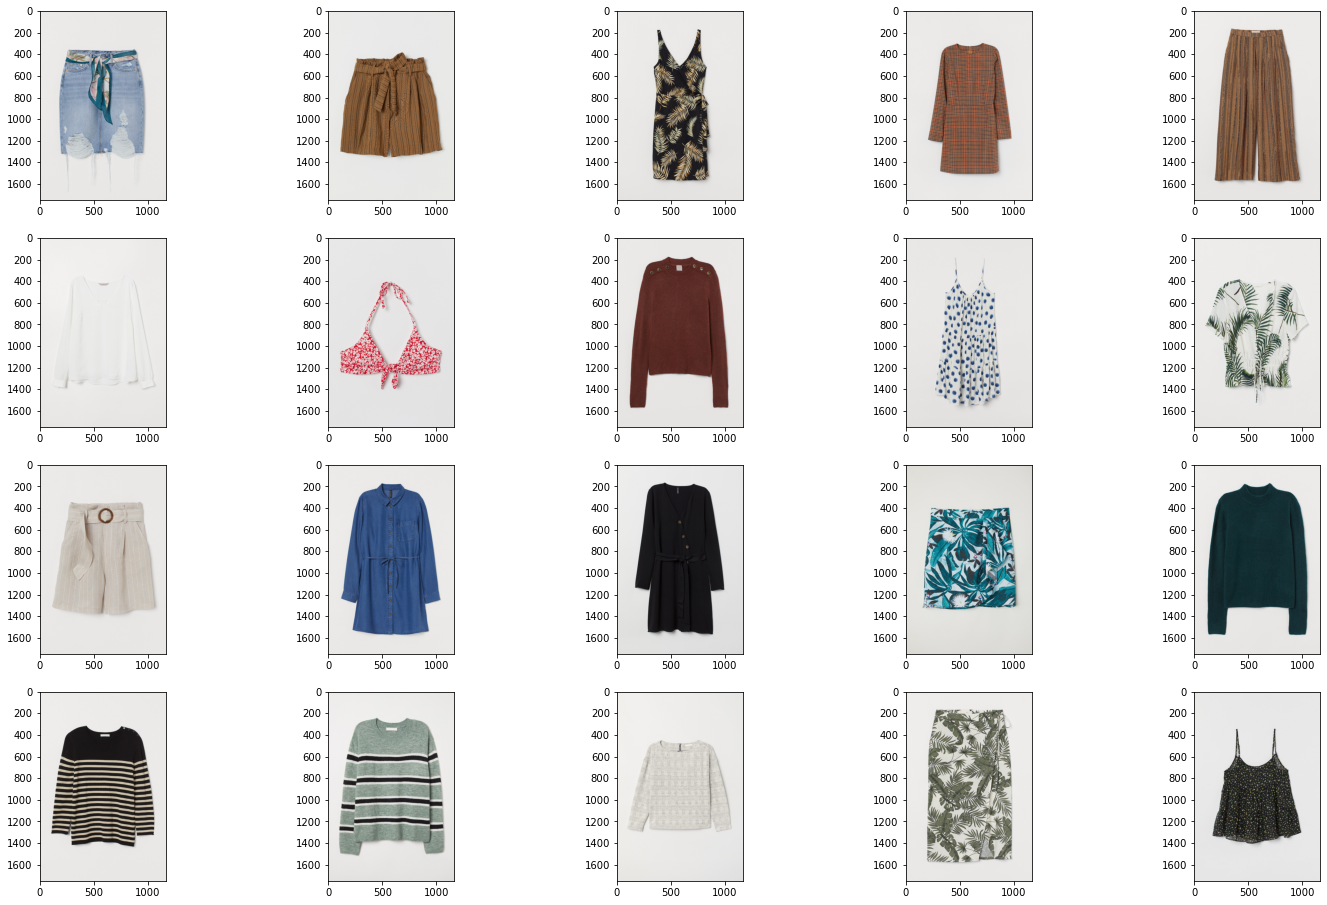

In [40]:
fig = plt.figure(figsize=(25, 16))

rows=4
columns=5

for i in range(20):
    fig.add_subplot(rows, columns, i+1)
    try:
        img = support.get_image(second_customer.value_counts('article_id')[0:20].index[i])
        imgplot = plt.imshow(img.permute(1,2,0))
    except:
        print("item "+str(i+1)+ " not found (i.d. "+"0"+str(top10.index[i])+" ).")
